<a id='Оглавление'></a>
### [Описание проекта](#Описание_проекта)
### [Описание тарифов](#Описание_тарифов)
### [Описание данных](#Описание_данных)
### [Знакомство с данными](#Знакомство_с_данными)
   * #### [Таблица calls](#Таблица_calls)
   * #### [Таблица internet](#Таблица_internet)
   * #### [Таблица messages](#Таблица_messages)
   * #### [Таблица tariffs](#Таблица_tariffs)
   * #### [Таблица users](#Таблица_users)

### [Знакомство с данными](#Знакомство_с_данными)
### [Обработка данных](#Обработка_данных)
   * #### [Окгругление и изменение типа данных](#Изменение_типа_данных)
   * #### [Обработка нулевых значений](#Обработка_нулевых_значений)
   
### [Подготовка данных](#Подготовка_данных)
   * #### [Количество сделанных звонков и израсходованных минут разговора по месяцам](#Количество_звонков)
   * #### [Количество отправленных сообщений по месяцам](#Количество_сообщений)
   * #### [Объем израсходованного интернет-трафика по месяцам](#Объем_трафика)
   * #### [Помесячная выручка с каждого пользователя](#Помесячная_выручка)
   
### [Анализ данных](#Анализ_данных)
### [Проверка гипотез](#Проверка_гипотез)
### [Общий вывод](#Общий_вывод)

<a id='Описание_проекта'></a>
## Описание проекта
[Оглавление](#Оглавление)

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.



<a id='Описание_тарифов'></a>
## Описание тарифов
[Оглавление](#Оглавление)


**Тариф «Смарт»**

* Ежемесячная плата: 550 рублей
* Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:
 *  минута разговора: 3 рубля
 *  сообщение: 3 рубля
 * 1 Гб интернет-трафика: 200 рублей



**Тариф «Ультра»**
* Ежемесячная плата: 1950 рублей
* Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:
 - минута разговора: 1 рубль
 - сообщение: 1 рубль
 - 1 Гб интернет-трафика: 150 рублей

*Обратите внимание: «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

<a id='Описание_данных'></a>
## Описание данных
[Оглавление](#Оглавление)

Таблица ***users*** (информация о пользователях):

* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* tariff — название тарифного плана

Таблица ***calls*** (информация о звонках):
* id — уникальный номер звонка
* call_date — дата звонка
* duration — длительность звонка в минутах
* user_id — идентификатор пользователя, сделавшего звонок

Таблица ***messages*** (информация о сообщениях):
* id — уникальный номер сообщения
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение

Таблица ***internet*** (информация об интернет-сессиях):
* id — уникальный номер сессии
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
* session_date — дата интернет-сессии
* user_id — идентификатор пользователя

Таблица ***tariffs*** (информация о тарифах):
* tariff_name — название тарифа
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со  101 минуты будет взиматься плата)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

Примечание. Если объединение таблиц методом merge приводит к ошибке dead kernell, примените метод join — это облегчит нагрузку на Jupyter Notebook

<a id='Знакомство_с_данными'></a>
## Знакомство с данными
[Оглавление](#Оглавление)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from scipy import stats as st

In [2]:
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

<a id='Таблица_calls'></a>
### Таблица calls (информация о звонках)
[Оглавление](#Оглавление)

Таблица ***calls*** (информация о звонках):
* id — уникальный номер звонка
* call_date — дата звонка
* duration — длительность звонка в минутах
* user_id — идентификатор пользователя, сделавшего звонок

In [3]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [4]:
calls.sample(10)

,id,call_date,duration,user_id
149737,1377_584,2018-09-07,0.00,1377
102092,1262_449,2018-08-17,10.12,1262
44488,1112_192,2018-09-10,0.00,1112
36049,1089_522,2018-03-11,6.46,1089
17816,1049_171,2018-06-16,16.73,1049
17828,1049_183,2018-04-13,7.96,1049
194788,1477_536,2018-09-08,5.07,1477
182818,1454_570,2018-08-26,2.15,1454
117582,1302_222,2018-03-15,2.35,1302
56252,1143_316,2018-07-19,12.81,1143


In [5]:
calls['duration'].describe()

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

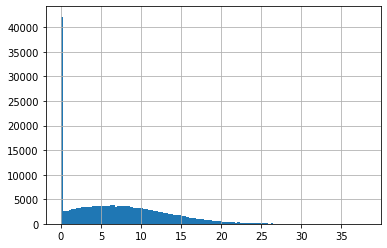

In [6]:
calls['duration'].hist(bins = 'auto')

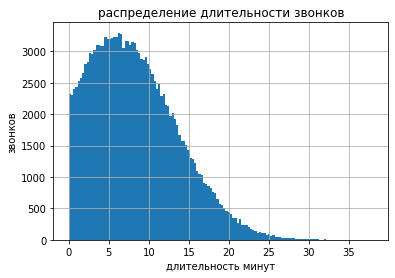

In [7]:
duration = calls[calls['duration'] > 0]['duration'].hist(bins = 'auto')
duration.set_title('распределение длительности звонков')
duration.set_xlabel('длительность минут')
duration.set_ylabel('звонков')
plt.show()

#### Вывод:

- у call_date нужно изменить тип данных
- duration нужно округлить вверх до минут и перевести в int
- явных пропусков нет
- неправдоподобные значения отсутствуют
- звонки нулевой длительности потребуют внимания

<a id='Таблица_internet'></a>
### Таблица internet (информация об интернет-сессиях)
[Оглавление](#Оглавление)

Таблица ***internet*** (информация об интернет-сессиях):
* id — уникальный номер сессии
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
* session_date — дата интернет-сессии
* user_id — идентификатор пользователя

In [8]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [9]:
internet.sample(20)

,Unnamed: 0,id,mb_used,session_date,user_id
143459,143459,1480_147,918.21,2018-09-01,1480
82938,82938,1282_12,0.00,2018-06-02,1282
133313,133313,1446_96,549.00,2018-11-20,1446
116811,116811,1393_297,841.60,2018-10-20,1393
25895,25895,1089_187,368.16,2018-03-08,1089
143903,143903,1481_257,173.84,2018-10-10,1481
78441,78441,1264_60,173.93,2018-06-27,1264
13158,13158,1045_334,346.78,2018-08-12,1045
92757,92757,1314_111,237.02,2018-07-30,1314
89460,89460,1302_260,438.96,2018-12-10,1302


In [10]:
internet['mb_used'].describe()

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

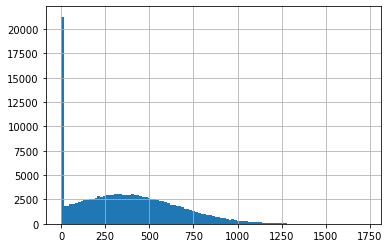

In [11]:
internet['mb_used'].hist(bins = 'auto')

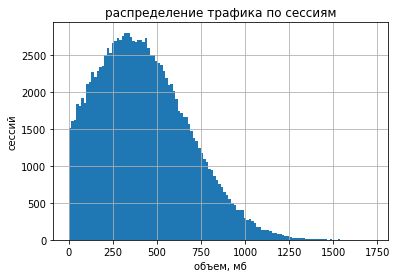

In [12]:
duration = internet[internet['mb_used'] > 0]['mb_used'].hist(bins = 'auto')
duration.set_title('распределение трафика по сессиям')
duration.set_xlabel('объем, мб')
duration.set_ylabel('сессий')
plt.show()

#### Вывод:

- не заявленный столбец ***Unnamed: 0***, дублирующий индексы
- у session_date нужно изменить тип данных
- в mb_used нужно округлить в большую сторону и изменить тип данных
- явных пропусков нет
- неправдоподобные значения отсутствуют
- нулевой трафик потребует внимания

<a id='Таблица_messages'></a>
### Таблица messages (информация о сообщениях)
[Оглавление](#Оглавление)

Таблица ***messages*** (информация о сообщениях):
* id — уникальный номер сообщения
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение

In [13]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [14]:
messages.sample(20)

,id,message_date,user_id
43018,1186_431,2018-04-16,1186
91253,1378_83,2018-09-30,1378
4909,1021_65,2018-12-23,1021
79688,1333_44,2018-11-21,1333
108668,1436_162,2018-07-31,1436
51111,1227_136,2018-05-19,1227
50146,1222_350,2018-12-27,1222
27018,1113_177,2018-07-21,1113
44784,1196_234,2018-08-23,1196
100699,1412_1,2018-09-28,1412


#### Вывод:

- у message_date нужно изменить тип данных
- явных пропусков нет


<a id='Таблица_tariffs'></a>
### Таблица tariffs (информация о тарифах)
[Оглавление](#Оглавление)
    
Таблица ***tariffs*** (информация о тарифах):
* tariff_name — название тарифа
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со  101 минуты будет взиматься плата)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)   

In [15]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [16]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<a id='Таблица_users'></a>
### Таблица users (информация о пользователях)
[Оглавление](#Оглавление)

Таблица ***users*** (информация о пользователях):

* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* tariff — название тарифного плана

In [17]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [18]:
users.sample(20)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
433,1433,71,NaN,Подольск,Клариса,Алёшкова,2018-01-05,smart
35,1035,37,NaN,Тюмень,Розалия,Аракина,2018-04-03,smart
245,1245,32,NaN,Москва,Маргарита,Коновалова,2018-09-10,ultra
184,1184,21,NaN,Барнаул,Снежана,Тарасова,2018-09-03,smart
163,1163,21,2018-12-16,Москва,Лев,Вишневский,2018-11-03,smart
223,1223,20,NaN,Стерлитамак,Алан,Панфилов,2018-12-12,smart
66,1066,47,NaN,Астрахань,Исак,Малахов,2018-06-24,smart
481,1481,70,NaN,Москва,Клавдия,Чижова,2018-02-26,smart
183,1183,20,NaN,Владивосток,Снежана,Озерова,2018-07-12,smart
164,1164,49,NaN,Магнитогорск,Геральд,Лебедев,2018-04-03,smart


In [19]:
users['age'].describe()

count    500.00000
mean      46.58800
std       16.66763
min       18.00000
25%       32.00000
50%       46.00000
75%       62.00000
max       75.00000
Name: age, dtype: float64

#### Вывод:

- у reg_date нужно изменить тип данных
- В churn_date всего 38 значений, но мы предупреждены. Тариф у остальных текущий. 
- неправдоподобные значения отсутствуют

<a id='Обработка_данных'></a>
## Обработка данных
[Оглавление](#Оглавление)

<a id='Изменение_типа_данных'></a>
### Окгругление и изменение типа данных
[Оглавление](#Оглавление)

In [20]:
calls['duration'] = calls['duration'].apply(np.ceil)
calls['duration'] = calls['duration'].astype('int64')

In [21]:
internet['mb_used'] = internet['mb_used'].apply(np.ceil)
internet['mb_used'] = internet['mb_used'].astype('int64')

In [22]:
def to_datetime(df, columns):
    for col in columns:
        df[col] = pd.to_datetime(df[col], format= '%Y-%m-%d')

In [23]:
to_datetime(calls, ['call_date'])
to_datetime(messages, ['message_date'])
to_datetime(users, ['reg_date', 'churn_date'])
to_datetime(internet, ['session_date'])

In [24]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null int64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB


In [25]:
calls.sample(10)

,id,call_date,duration,user_id
28690,1072_16,2018-05-06,9,1072
99436,1253_36,2018-12-26,1,1253
27823,1068_175,2018-11-17,19,1068
17357,1048_147,2018-10-17,13,1048
147930,1375_761,2018-02-28,1,1375
149533,1377_380,2018-10-29,22,1377
109436,1282_330,2018-04-03,8,1282
146991,1374_425,2018-04-02,0,1374
175157,1433_56,2018-05-23,13,1433
12399,1032_418,2018-03-26,16,1032


In [26]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null int64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 5.7+ MB


In [27]:
internet.sample(10)

,Unnamed: 0,id,mb_used,session_date,user_id
26448,26448,1092_114,298,2018-09-16,1092
39191,39191,1136_38,680,2018-12-25,1136
118750,118750,1401_171,366,2018-04-15,1401
62871,62871,1213_253,463,2018-12-30,1213
127092,127092,1426_173,192,2018-09-14,1426
63852,63852,1217_420,275,2018-09-01,1217
105761,105761,1357_188,0,2018-12-13,1357
28598,28598,1099_262,406,2018-05-20,1099
27093,27093,1093_296,334,2018-07-24,1093
36938,36938,1127_288,1105,2018-11-11,1127


In [28]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [29]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


##### Вывод:
 
 - Все даты теперь имеют соответствующий формат
 - минуты и мб округлены в большую сторону и имеют соответствующий формат

<a id='Обработка_нулевых_значений'></a>
### Обработка нулевых значений
[Оглавление](#Оглавление)

Звонки нулевой длины дают нам информацию о факте несостоявшегося звонка, т.е. об активности клиента и востребованности такого способа связи. Выбрасывать их нет особых причин. При необходимости, нужно будет брать ненулевой срез, чтобы ничего не исказить. 

Ситуация с нулевым трафиком аналогичная.

In [30]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,113,2018-11-25,1000
1,1,1000_1,1053,2018-09-07,1000
2,2,1000_2,1198,2018-06-25,1000
3,3,1000_3,551,2018-08-22,1000
4,4,1000_4,303,2018-09-24,1000


In [31]:
internet = internet.drop(columns = ['Unnamed: 0'])

In [32]:
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,113,2018-11-25,1000
1,1000_1,1053,2018-09-07,1000
2,1000_2,1198,2018-06-25,1000
3,1000_3,551,2018-08-22,1000
4,1000_4,303,2018-09-24,1000


##### Вывод:

- Дублирующая индексы колонка была удалена 
- Нулевые значения оставляем без вмешательства

<a id='Подготовка_данных'></a>
## Подготовка данных
[Оглавление](#Оглавление)


<a id='Количество_звонков'></a>
### Количество сделанных звонков и израсходованных минут разговора по месяцам
[Оглавление](#Оглавление)


In [33]:
calls['month'] = calls['call_date'].dt.month

In [34]:
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


In [35]:
total_calls = calls.groupby(['user_id', 'month'])\
                  .agg({'id':'count', 'duration':'sum'})\
                  .reset_index()\
                  .rename(columns={'id':'month_calls', 'duration':'calls_duration'})

In [36]:
total_calls.head(20)

,user_id,month,month_calls,calls_duration
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466
5,1000,10,57,350
6,1000,11,43,338
7,1000,12,46,333
8,1001,11,59,430
9,1001,12,63,414


<a id='Количество_сообщений'></a>
### Количество отправленных сообщений по месяцам
[Оглавление](#Оглавление)


In [37]:
messages['month'] = messages['message_date'].dt.month

In [38]:
total_messages = messages.groupby(['user_id', 'month'])\
                        .agg({'id':'count'})\
                        .reset_index()\
                        .rename(columns={'id':'month_messages'})

In [39]:
total_messages.head(20)

,user_id,month,month_messages
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
5,1000,10,73
6,1000,11,58
7,1000,12,70
8,1002,6,4
9,1002,7,11


<a id='Объем_трафика'></a>
### Объем израсходованного интернет-трафика по месяцам
[Оглавление](#Оглавление)


In [40]:
internet['month'] = internet['session_date'].dt.month

In [41]:
month_internet = internet.groupby(['user_id', 'month'])\
                        .agg({'mb_used':'sum'})\
                        .reset_index()\
                        .rename(columns={'mb_used':'month_traffic_mb'})

In [42]:
month_internet.head()

,user_id,month,month_traffic_mb
0,1000,5,2256
1,1000,6,23257
2,1000,7,14016
3,1000,8,14070
4,1000,9,14581


In [43]:
internet.pivot_table(index=['user_id', internet['session_date'].dt.month], values='mb_used', aggfunc='sum')

mb_used
user_id session_date         
1000    5                2256
        6               23257
        7               14016
        8               14070
        9               14581
...                       ...
1498    10              20604
1499    9                1848
        10              17809
        11              17984
        12              13077

[3203 rows x 1 columns]

<a id='Помесячная_выручка'></a>
### Помесячная выручка с каждого пользователя
[Оглавление](#Оглавление)


In [44]:
profit = total_calls.merge(total_messages, on=['user_id','month'], how = 'outer')

In [45]:
profit.head()

,user_id,month,month_calls,calls_duration,month_messages
0,1000,5,22.0,159.0,22.0
1,1000,6,43.0,172.0,60.0
2,1000,7,47.0,340.0,75.0
3,1000,8,52.0,408.0,81.0
4,1000,9,58.0,466.0,57.0


In [46]:
profit = profit.merge(month_internet, on=['user_id','month'], how = 'outer')

In [47]:
profit.head()

,user_id,month,month_calls,calls_duration,month_messages,month_traffic_mb
0,1000,5,22.0,159.0,22.0,2256.0
1,1000,6,43.0,172.0,60.0,23257.0
2,1000,7,47.0,340.0,75.0,14016.0
3,1000,8,52.0,408.0,81.0,14070.0
4,1000,9,58.0,466.0,57.0,14581.0


In [48]:
profit = profit.merge(users[['user_id', 'tariff', 'city']], on = 'user_id', how = 'outer')

In [49]:
profit.rename(columns = {'tariff':'tariff_name'}, inplace = True)

In [50]:
profit.head()

,user_id,month,month_calls,calls_duration,month_messages,month_traffic_mb,tariff_name,city
0,1000,5.0,22.0,159.0,22.0,2256.0,ultra,Краснодар
1,1000,6.0,43.0,172.0,60.0,23257.0,ultra,Краснодар
2,1000,7.0,47.0,340.0,75.0,14016.0,ultra,Краснодар
3,1000,8.0,52.0,408.0,81.0,14070.0,ultra,Краснодар
4,1000,9.0,58.0,466.0,57.0,14581.0,ultra,Краснодар


In [51]:
profit = profit.merge(tariffs, on = 'tariff_name', how = 'outer')

In [52]:
profit.head()

,user_id,month,month_calls,calls_duration,month_messages,month_traffic_mb,tariff_name,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.0,22.0,159.0,22.0,2256.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
1,1000,6.0,43.0,172.0,60.0,23257.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
2,1000,7.0,47.0,340.0,75.0,14016.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
3,1000,8.0,52.0,408.0,81.0,14070.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
4,1000,9.0,58.0,466.0,57.0,14581.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1


In [53]:
def over_the_norm(row): 
    
    minutes = 0
    messages = 0 
    traffic_mb = 0
    
    if row['calls_duration'] - row['minutes_included'] > 0:
        minutes = (row['calls_duration'] - row['minutes_included']) * row['rub_per_minute']
        
    if row['month_messages'] - row['messages_included'] > 0:
        messages = (row['month_messages'] - row['messages_included']) * row['rub_per_message']
        
    if row['month_traffic_mb'] - row['mb_per_month_included'] > 0:
        traffic_mb = (row['month_traffic_mb'] - row['mb_per_month_included']) * row['rub_per_gb'] / 1024
    
    return minutes + messages + traffic_mb

In [54]:
profit['additional fee'] = profit.apply(over_the_norm, axis = 1)

In [55]:
profit.sample(5)

,user_id,month,month_calls,calls_duration,month_messages,month_traffic_mb,tariff_name,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,additional fee
140,1089,5.0,61.0,465.0,148.0,19468.0,ultra,Иркутск,1000,30720,3000,1950,150,1,1,0.000000
578,1335,10.0,107.0,671.0,94.0,15604.0,ultra,Москва,1000,30720,3000,1950,150,1,1,0.000000
1029,1009,4.0,39.0,324.0,14.0,14730.0,smart,Пермь,50,15360,500,550,200,3,3,0.000000
748,1391,10.0,108.0,837.0,4.0,24511.0,ultra,Стерлитамак,1000,30720,3000,1950,150,1,1,0.000000
2486,1327,6.0,68.0,459.0,47.0,18191.0,smart,Новороссийск,50,15360,500,550,200,3,3,552.929688


In [56]:
profit['total'] = profit['additional fee'] + profit['rub_monthly_fee']

In [57]:
profit.sample(10)

,user_id,month,month_calls,calls_duration,month_messages,month_traffic_mb,tariff_name,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,additional fee,total
1019,1007,5.0,67.0,480.0,39.0,17708.0,smart,Москва,50,15360,500,550,200,3,3,458.593750,1008.593750
759,1396,1.0,51.0,418.0,57.0,5342.0,ultra,Пенза,1000,30720,3000,1950,150,1,1,0.000000,1950.000000
2327,1293,9.0,25.0,148.0,38.0,15192.0,smart,Санкт-Петербург,50,15360,500,550,200,3,3,0.000000,550.000000
984,1473,12.0,NaN,NaN,20.0,18432.0,ultra,Красноярск,1000,30720,3000,1950,150,1,1,0.000000,1950.000000
903,1466,11.0,65.0,473.0,NaN,15234.0,ultra,Новосибирск,1000,30720,3000,1950,150,1,1,0.000000,1950.000000
954,1091,7.0,NaN,NaN,35.0,16460.0,ultra,Набережные Челны,1000,30720,3000,1950,150,1,1,0.000000,1950.000000
2108,1241,12.0,40.0,249.0,16.0,24469.0,smart,Новосибирск,50,15360,500,550,200,3,3,1779.101562,2329.101562
2797,1410,12.0,51.0,402.0,20.0,15194.0,smart,Нижний Тагил,50,15360,500,550,200,3,3,0.000000,550.000000
1116,1027,12.0,66.0,516.0,15.0,22277.0,smart,Петрозаводск,50,15360,500,550,200,3,3,1398.976562,1948.976562
2649,1374,10.0,72.0,617.0,80.0,21340.0,smart,Махачкала,50,15360,500,550,200,3,3,1608.968750,2158.968750


In [58]:
profit['calls_duration']

0       159.0
1       172.0
2       340.0
3       408.0
4       466.0
        ...  
3211      NaN
3212      NaN
3213      NaN
3214      NaN
3215      NaN
Name: calls_duration, Length: 3216, dtype: float64

In [87]:
profit['calls_duration'].fillna('ahahah')

0          159
1          172
2          340
3          408
4          466
         ...  
3211    ahahah
3212    ahahah
3213    ahahah
3214    ahahah
3215    ahahah
Name: calls_duration, Length: 3216, dtype: object

In [88]:
profit['calls_duration'].mean()

456.9316320100819

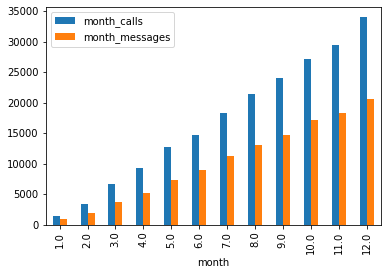

In [59]:
profit.groupby('month')['month_calls', 'month_messages'].sum().plot(kind = 'bar')
plt.show()

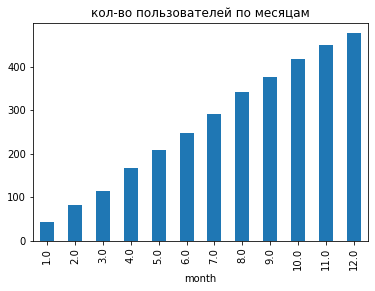

In [60]:
profit.groupby('month')['user_id'].count().plot(kind = 'bar', title = 'кол-во пользователей по месяцам')
plt.show()

In [61]:
profit['user_id'].sample()

2785    1409
Name: user_id, dtype: int64

In [62]:
def plt_show(id):
    profit.query(f'user_id == {id}').groupby('month')['month_messages', 'month_calls'].sum().plot(kind = 'bar', title = 'кол-во звонков и сообщений в месяц')
    plt.show()
    profit.query(f'user_id == {id}').groupby('month')['calls_duration'].sum().plot(kind = 'bar', title = 'длительность звонков по месяцам, мин. ')
    plt.show()
    profit.query(f'user_id == {id}').groupby('month')['month_traffic_mb'].sum().plot(kind = 'bar', title = 'потребление трафика по месяцам, мб.')
    plt.show()

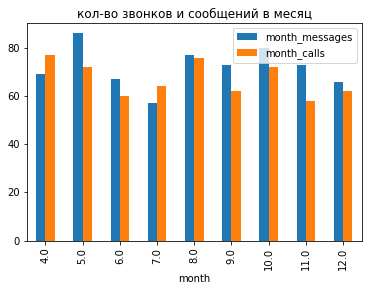

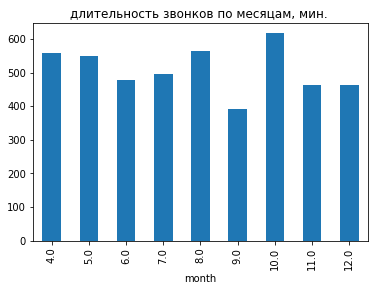

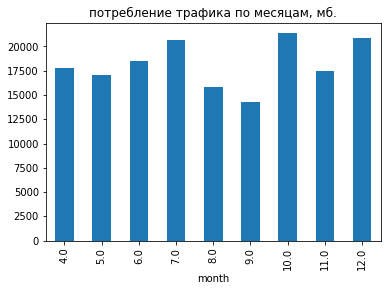

In [63]:
plt_show(1374)

<a id='Анализ_данных'></a>
### Анализ данных
[Оглавление](#Оглавление)

In [64]:
metric = ['calls_duration', 'month_messages', 'month_traffic_mb']

for x in range(len(metric)):
    print(profit.groupby('tariff_name').agg({metric[x]:['mean','var','std']}), '\n')
    #print('\n')

            calls_duration                          
                      mean           var         std
tariff_name                                         
smart           419.062978  35844.189551  189.325618
ultra           545.451104  94203.418396  306.925754 

            month_messages                        
                      mean          var        std
tariff_name                                       
smart            38.716441   717.594201  26.787949
ultra            61.161006  2109.659183  45.931026 

            month_traffic_mb                           
                        mean           var          std
tariff_name                                            
smart           16236.472621  3.444310e+07  5868.824472
ultra           19686.767179  9.904344e+07  9952.057054 



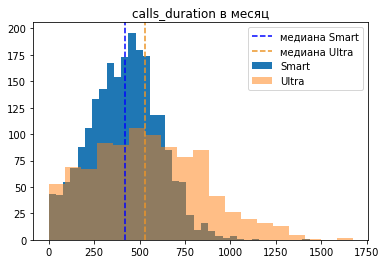

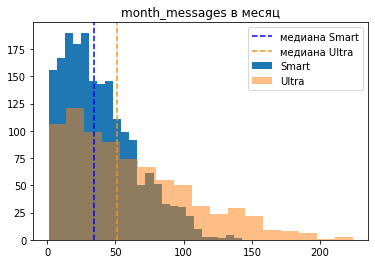

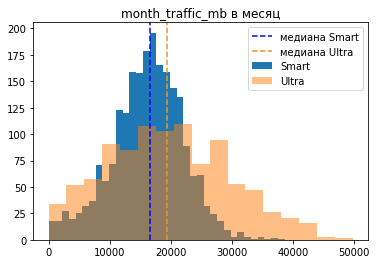

In [65]:
for x in range(len(metric)):
      
    plt.hist(profit[profit['tariff_name'] == 'smart'][metric[x]],bins = 'auto')
    plt.axvline(x = profit[profit['tariff_name'] == 'smart'][metric[x]].median(), color = '#0004ff', linestyle='--')
    
    
    plt.hist(profit[profit['tariff_name'] == 'ultra'][metric[x]],bins = 'auto', alpha = 0.5)
    plt.axvline(x = profit[profit['tariff_name'] == 'ultra'][metric[x]].median(), color = '#ec9528', linestyle='--')
    
    plt.title(f'{metric[x]} в месяц')
    plt.legend(['медиана Smart', 'медиана Ultra','Smart', 'Ultra'])
    plt.show()

In [66]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


#### Вывод:

Кол-во минут в месяц:

- Значительной части пользователей тарифа 'smart' хватает предоставляемых минут
- Мало кто из пользователей 'ultra' использует хотя бы половину пакетных минут
- Пользователи 'ultra' в среднем тратят на 120 минут больше пользователей 'smart'

Сообщений в месяц:

- В среднем пользователи всех тарифов укладываются в лимит сообщений, но услуга не самая популярная
- В случае тарифа 'smart' допустимы превышения, что для тарифа 'ultra' практически исключено

Трафика в месяц:

- Средний показатель тарифа 'smart' превышает пакетное предложение
- Тариф 'ultra' в среднем укладывается, но по графику видно, что окончательный спад начинается около 30гб, это говорит нам о 

Тариф 'ultra' оказался избыточным во всем. 
Графики у этого тарифа более равномерно распределены. Т.к. весомая часть значений этого тарифа находится в лимитах тарифа 'smart', то можно предположить очень хорошее продвижение у тарифа или неразборчиыость абонентов. 

Пользователи тарифа 'smart' либо лучше следят за своими лимитами, либо тариф хорошо сбалансирован (среднее всегда с небольшим запасом около пакетного значения, после которого идет резкий спад). Но, требуется скорректировать обьем трафика в сторону увеличения. 

<a id='Проверка_гипотез'></a>
### Проверка гипотез
[Оглавление](#Оглавление)


#### Гипотеза №1:
 
 H₀: Средняя выручка пользователей тарифов "Ультра" и "Смарт" не различается
 
 H₁: Средняя выручка пользователей тарифов "Ультра" и "Смарт" различается

In [67]:
def outliners(df, column):
    q_low = df[column].quantile(0.01)
    q_hi = df[column].quantile(0.99)
    
    df_filtred = df[(df[column] < q_hi) & (df[column] > q_low)]
    
    return df_filtred

In [68]:
smart = profit[profit['tariff_name'] == 'smart']
ultra = profit[profit['tariff_name'] == 'ultra']

In [69]:
smart = outliners(smart, 'total')

In [70]:
ultra = outliners(ultra, 'total')

In [71]:
alpha = .05

results = st.ttest_ind(smart["total"], ultra["total"])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.9709705822722266e-76
Отвергаем нулевую гипотезу


#### Гипотеза №2:
 
 H₀: Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов
 
 H₁: Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [72]:
profit['city'].unique()

array(['Краснодар', 'Москва', 'Новокузнецк', 'Иваново', 'Омск', 'Уфа',
       'Томск', 'Санкт-Петербург', 'Тверь', 'Ярославль', 'Тюмень',
       'Ростов-на-Дону', 'Калуга', 'Тула', 'Волгоград', 'Саранск',
       'Иркутск', 'Череповец', 'Новосибирск', 'Брянск', 'Тольятти',
       'Нижний Тагил', 'Воронеж', 'Махачкала', 'Пермь', 'Сургут', 'Пенза',
       'Мурманск', 'Набережные Челны', 'Самара', 'Нижний Новгород',
       'Кемерово', 'Кострома', 'Оренбург', 'Магнитогорск', 'Астрахань',
       'Нижневартовск', 'Челябинск', 'Курган', 'Красноярск',
       'Владивосток', 'Смоленск', 'Владимир', 'Казань', 'Саратов',
       'Севастополь', 'Рязань', 'Екатеринбург', 'Стерлитамак',
       'Ульяновск', 'Балашиха', 'Барнаул', 'Киров', 'Сочи', 'Вологда',
       'Чебоксары', 'Волжский', 'Чита', 'Петрозаводск', 'Хабаровск',
       'Ставрополь', 'Улан-Удэ', 'Курск', 'Якутск', 'Химки',
       'Владикавказ', 'Ижевск', 'Орёл', 'Белгород', 'Архангельск',
       'Липецк', 'Тамбов', 'Калининград', 'Новороссий

In [73]:
moscow = profit[profit['city'] == 'Москва']
not_moscow = profit[profit['city'] != 'Москва']

In [74]:
moscow = outliners(moscow, 'total')

In [75]:
not_moscow = outliners(not_moscow, 'total')

In [76]:
alpha = .05

results = st.ttest_ind(moscow['total'], not_moscow['total'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.2936304740221562
Не получилось отвергнуть нулевую гипотезу


#### Вывод:

- Средняя выручка "оказалась" разной не случайно. При абоненской плате 550р к 1950р это можно сказать было ожидаемо (), даже с учетом более частых превышений пакета тарифа 'smart'. (среднее smart = 1233 & ultra = 2060)

- Средняя выручка между Москвой (1507р) и другими местами (1481р) оказалась одинаковой, т.е. разной, но такую разницу можно поучить случайно. Это логично, так как тарифы не различались по географическому признаку.

In [77]:
#profit[profit['tariff_name'] == 'smart'].mean()

In [78]:
#profit[profit['city'] != 'Москва'].mean()

<a id='Общий_вывод'></a>
## Общий вывод:
[Оглавление](#Оглавление)

- Тариф "smart" проявил себя, как более эффективное решение. В нем используется почти весь пакет услуг, но так же не редко его оказывается недостаточно. 
- Тариф "ultra" подходит для неопределившихся, не без ущерба для их кармана. В среднем с тарифом 'ultra' расходуют всего на 100 минут, 20 сообщений и 3гб больше, чем со 'smart' при разнице абонентской платы в 3.5 раза. 
- Средняя выручка от абонентов разных тарифов различается неслучайно
- Средня выручка от абонентов в разных городах примерно равна